In [ ]:
#import data set
from tensorflow.keras.datasets import cifar10

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [ ]:
class_names = ['0 airplane' ,'1 automobile','2 bird','3 cat','4 deer','5 dog','6 frog', '7 horse', '8 ship', '9 truck']

In [ ]:
print(class_names[9])

9 truck


In [ ]:
x_train.max(), x_train.min(), x_train.mean() #rang of images max and min)

(255, 0, 120.70756512369792)

In [ ]:
y_train.max(), y_train.min() #the 10 classes

(9, 0)

In [ ]:
#normalize the images
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train.max() , x_train.min()

(1.0, 0.0)

In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

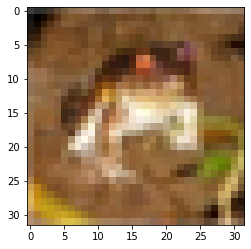

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
class_names[6]

'6 frog'

In [ ]:
#define the object
model = tf.keras.models.Sequential()

In [ ]:
#add first convulutional layer
#1. No of filters (kernel) =32
#2 Kernel size = 3
#3 padding = same
#4 activation function = ReLu
#5 Input shape = 32,32,3

In [ ]:
#ADD FIRST CNN LAYER
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu', input_shape=[32,32,3]))

In [ ]:
#add second convulutional layer
#1. No of filters (kernel) =32
#2 Kernel size = 3
#3 padding = same
#4 activation function = ReLu
#5 OUT! Input shape = 32,32,3 ( dont specify shape in second layer!! )
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu'))

In [ ]:
#MAX POOL PARAMETERS
# pool size = 2
# strides = 2
# padding = valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2, padding='valid'))

In [ ]:
#adding the third CNN layer
#1. No of filters (kernel) =64
#2 Kernel size = 3
#3 padding = same
#4 activation function = ReLu
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))

In [ ]:
#adding 4th CNN and MAX pool
#add second convulutional layer
#1. No of filters (kernel) = 64
#2 Kernel size = 3
#3 padding = same
#4 activation function = ReLu
#5 OUT! Input shape = 32,32,3 ( dont specify shape in second layer!! )
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))

#MAX POOL PARAMETERS
# pool size = 2
# strides = 2
# padding = valid
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2, padding='valid'))

In [ ]:
#add drop out layer
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
#Add the flattening layer ( converting an array into vector)
model.add(tf.keras.layers.Flatten())

In [ ]:
#add the first dense layers
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
#second dense layer which is output layer mulitple output so softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['sparse_categorical_accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
5000/5000 [==============================] - 253s 51ms/step - loss: 1.3838 - sparse_categorical_accuracy: 0.5019
Epoch 2/10
5000/5000 [==============================] - 255s 51ms/step - loss: 1.0061 - sparse_categorical_accuracy: 0.6433
Epoch 3/10
5000/5000 [==============================] - 257s 51ms/step - loss: 0.8617 - sparse_categorical_accuracy: 0.6958
Epoch 4/10
5000/5000 [==============================] - 252s 50ms/step - loss: 0.7759 - sparse_categorical_accuracy: 0.7264
Epoch 5/10
5000/5000 [==============================] - 255s 51ms/step - loss: 0.7096 - sparse_categorical_accuracy: 0.7495
Epoch 6/10
5000/5000 [==============================] - 256s 51ms/step - loss: 0.6593 - sparse_categorical_accuracy: 0.7652
Epoch 7/10
5000/5000 [==============================] - 254s 51ms/step - loss: 0.6097 - sparse_categorical_accuracy: 0.7835
Epoch 8/10
5000/5000 [==============================] - 263s 53ms/step - loss: 0.5775 - sparse_categorical_accuracy: 0.7948
Epoch 9/

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 12s 37ms/step - loss: 0.7528 - sparse_categorical_accuracy: 0.7485


In [ ]:
print("Accuracy", test_acc, "Loss", test_loss)

Accuracy 0.7484999895095825 Loss 0.7527797818183899


In [ ]:
y_pred = model.predict_classes(x_test)

In [ ]:
print(y_pred[100]), print(y_test[100])

4
[4]


(None, None)

In [ ]:
print(class_names[y_preed[100]])

4 deer


In [ ]:
#confusion metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[772  10  38  28  25   8   8   4  75  32]
 [ 20 840   4   8   3   5   8   1  28  83]
 [ 70   3 596 103  84  68  46  11  14   5]
 [ 16   1  58 623  55 157  52  20   8  10]
 [ 20   1  53  78 722  39  53  23   8   3]
 [ 12   1  42 182  24 687  22  22   1   7]
 [  7   1  52  80  28  18 807   1   3   3]
 [ 13   3  34  72  72  79   4 710   2  11]
 [ 53   7  14  18   8   4   1   1 860  34]
 [ 27  37   6  25   3   5   4   4  21 868]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)

In [ ]:
print(acc_cm)

0.7485
